<a href="https://colab.research.google.com/github/Aneel45/Yes_bank_stock_closing_price_detections/blob/main/Yes_bank_stock_closing_price_detection_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capstone Project   2  - Yes bank stock closing price detection



##### **Project Type**   - Linear Regression capstone project
##### **Contribution**   - Individual
##### **Full Name**      -Aneel chavhan

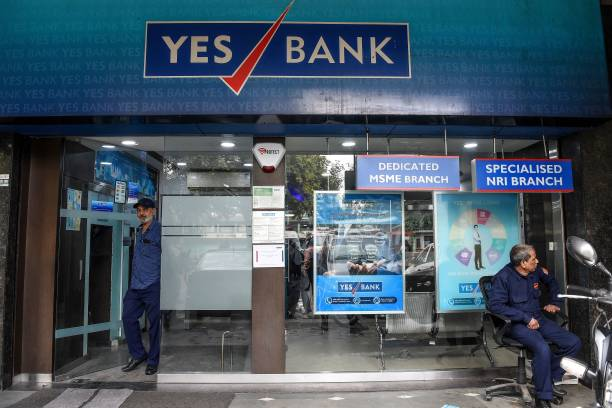

# **Project summery -**##

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.


This Dataset is taken from Money control (an Indian online business and financial news website). It has monthly stock price values of Yes Bank Limited from July 2005 (the year it was listed) to November 2020 (i.e. current month). It Gives Opening, Closing, Highest and Lowest Stock Prices of every month.

# **GitHub Link -**

https://github.com/Aneel45/Yes_bank_stock_closing_price_detections/blob/main/Yes_bank_stock_closing_price_detection_capstone_project.ipynb





# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [7]:
from sklearn import model_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math
import plotly.express as px
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge, ElasticNet,LassoCV,RidgeCV,ElasticNetCV)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (r2_score, mean_squared_error,  mean_absolute_percentage_error, mean_absolute_error) # requreed metrics
from sklearn import metrics
from sklearn.model_selection import (cross_val_score, TimeSeriesSplit)
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor                  #xgboost model




In [8]:
path = "/content/data_YesBank_StockPrices.csv"
yes_bank_df=pd.read_csv(path)

### Dataset Loading

In [9]:
# mount drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Load** the dataset

In [10]:
path = "/content/data_YesBank_StockPrices.csv"
yes_bank_df=pd.read_csv(path)

### Dataset First View

In [11]:
# Dataset First Look
yes_bank_df.head()

,Date,Open,High,Low,Close
0,5-Jul,13.00,14.00,11.25,12.46
1,5-Aug,12.58,14.88,12.55,13.42
2,5-Sep,13.48,14.87,12.27,13.30
3,5-Oct,13.20,14.47,12.40,12.99
4,5-Nov,13.35,13.88,12.88,13.41


In [12]:
# dataset tail look
yes_bank_df.tail()

,Date,Open,High,Low,Close
180,20-Jul,25.60,28.30,11.10,11.95
181,20-Aug,12.00,17.16,11.85,14.37
182,20-Sep,14.30,15.34,12.75,13.15
183,20-Oct,13.30,14.01,12.11,12.42
184,20-Nov,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [13]:
# Datset shape
yes_bank_df.shape

(185, 5)

In [14]:
#dataset row and columns count
print(yes_bank_df.index)
print('\n')
print(yes_bank_df.columns)


RangeIndex(start=0, stop=185, step=1)


Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


### Dataset Information

In [15]:
# The brief summary of dataset
yes_bank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [16]:
#the dataset information
yes_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [17]:
# Dataset Duplicate Value Count
 ## we use drop function drop.duplicate to delete duplicate
yes_bank_df.drop_duplicates(inplace=True)

uni_num_of_rows = yes_bank_df.shape[0]

# now we can check  unique rows
uni_num_of_rows


185

In [18]:
## Splitting the Dataset into the Independent Feature Matrix:
X = yes_bank_df.iloc[:, :-1].values
print(X)


[['5-Jul' 13.0 14.0 11.25]
 ['5-Aug' 12.58 14.88 12.55]
 ['5-Sep' 13.48 14.87 12.27]
 ['5-Oct' 13.2 14.47 12.4]
 ['5-Nov' 13.35 13.88 12.88]
 ['5-Dec' 13.49 14.44 13.0]
 ['6-Jan' 13.68 17.16 13.58]
 ['6-Feb' 15.5 16.97 15.4]
 ['6-Mar' 16.2 20.95 16.02]
 ['6-Apr' 20.56 20.8 18.02]
 ['6-May' 19.8 21.8 15.8]
 ['6-Jun' 18.2 18.4 13.4]
 ['6-Jul' 16.0 17.2 13.82]
 ['6-Aug' 15.9 18.6 15.7]
 ['6-Sep' 18.0 18.88 16.8]
 ['6-Oct' 18.78 24.2 18.5]
 ['6-Nov' 22.8 28.47 21.4]
 ['6-Dec' 25.4 29.66 24.4]
 ['7-Jan' 27.4 34.16 27.0]
 ['7-Feb' 30.2 32.6 26.8]
 ['7-Mar' 29.3 31.58 23.31]
 ['7-Apr' 27.0 31.99 26.2]
 ['7-May' 30.66 36.14 29.11]
 ['7-Jun' 33.89 36.38 30.4]
 ['7-Jul' 35.98 41.04 35.02]
 ['7-Aug' 37.5 39.0 30.2]
 ['7-Sep' 37.4 41.75 35.3]
 ['7-Oct' 41.8 47.3 33.6]
 ['7-Nov' 44.4 50.98 40.02]
 ['7-Dec' 46.4 54.0 45.0]
 ['8-Jan' 49.99 55.56 30.24]
 ['8-Feb' 50.88 53.97 44.4]
 ['8-Mar' 48.9 48.9 24.11]
 ['8-Apr' 33.9 35.8 28.51]
 ['8-May' 34.3 36.88 30.03]
 ['8-Jun' 31.22 32.22 22.62]
 ['8-Jul' 2

In [19]:
 ## extractting to the dataset to the get  dependendt  vector
Y = yes_bank_df.iloc[:, -1].values
print(Y)

[ 12.46  13.42  13.3   12.99  13.41  13.71  15.33  16.12  20.08  19.49
  18.03  15.62  16.16  17.84  18.46  22.78  25.32  26.97  30.16  28.63
  28.14  30.31  33.51  35.98  37.93  36.99  41.36  43.48  46.18  49.81
  50.54  49.42  33.75  34.06  31.13  22.85  25.45  26.83  24.13  13.58
  12.26  15.03  12.24  10.26   9.98  15.45  25.12  29.68  31.93  33.45
  40.99  47.31  50.57  53.41  49.84  47.32  50.97  57.1   57.57  53.83
  58.99  62.22  70.3   71.86  61.21  62.54  52.59  51.29  61.98  61.02
  60.07  62.38  62.13  55.61  54.5   62.9   54.49  47.72  65.99  69.14
  73.46  70.07  66.02  67.83  72.85  65.97  76.44  82.29  88.48  92.84
 104.41  94.5   85.71 100.28  97.49  92.2   64.76  48.65  57.5   73.76
  73.74  74.02  61.59  60.95  82.7   88.14 113.89 108.38 108.21 114.33
 111.7  136.83 142.08 154.57 172.5  172.55 163.31 167.96 176.52 168.6
 165.74 137.9  145.92 151.82 153.3  145.23 149.38 137.67 172.91 188.73
 206.39 221.3  243.44 272.56 250.85 253.52 234.28 231.26 279.1  290.56
 309.82

## Missing values/Null values

In [20]:

# Missing Values/Null Values Count
print(yes_bank_df.isnull().sum())

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


<Axes: >

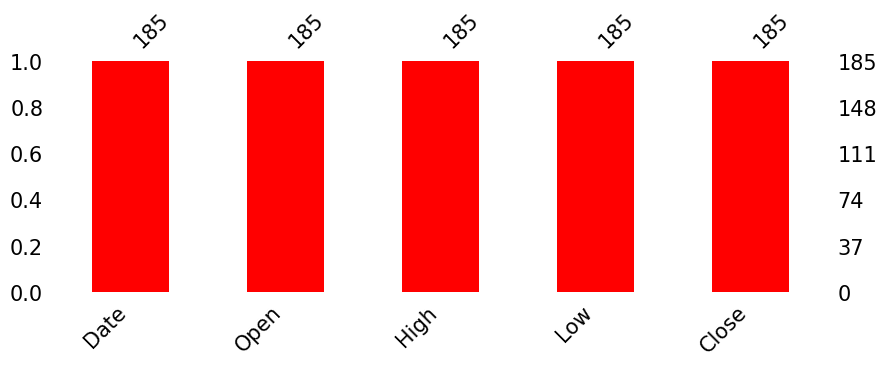

In [21]:
# Visualizing the missing values
import missingno as msno
msno.bar(yes_bank_df, color='red',sort='ascending', figsize=(10,3), fontsize=15)

<Axes: >

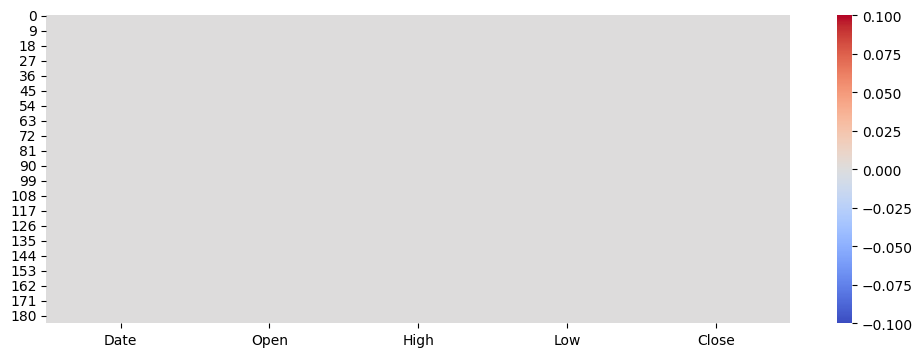

In [22]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(yes_bank_df.isna(), cmap = 'coolwarm')


### Check Unique Values for each variable.

In [23]:
# Check Unique Values for each variable.
yes_bank_df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [24]:
# Check Unique Values for each variable.
for i in yes_bank_df.columns.tolist():
  print("No. of unique values in ",i,"is",yes_bank_df[i].nunique())

No. of unique values in  Date is 185
No. of unique values in  Open is 183
No. of unique values in  High is 184
No. of unique values in  Low is 183
No. of unique values in  Close is 185


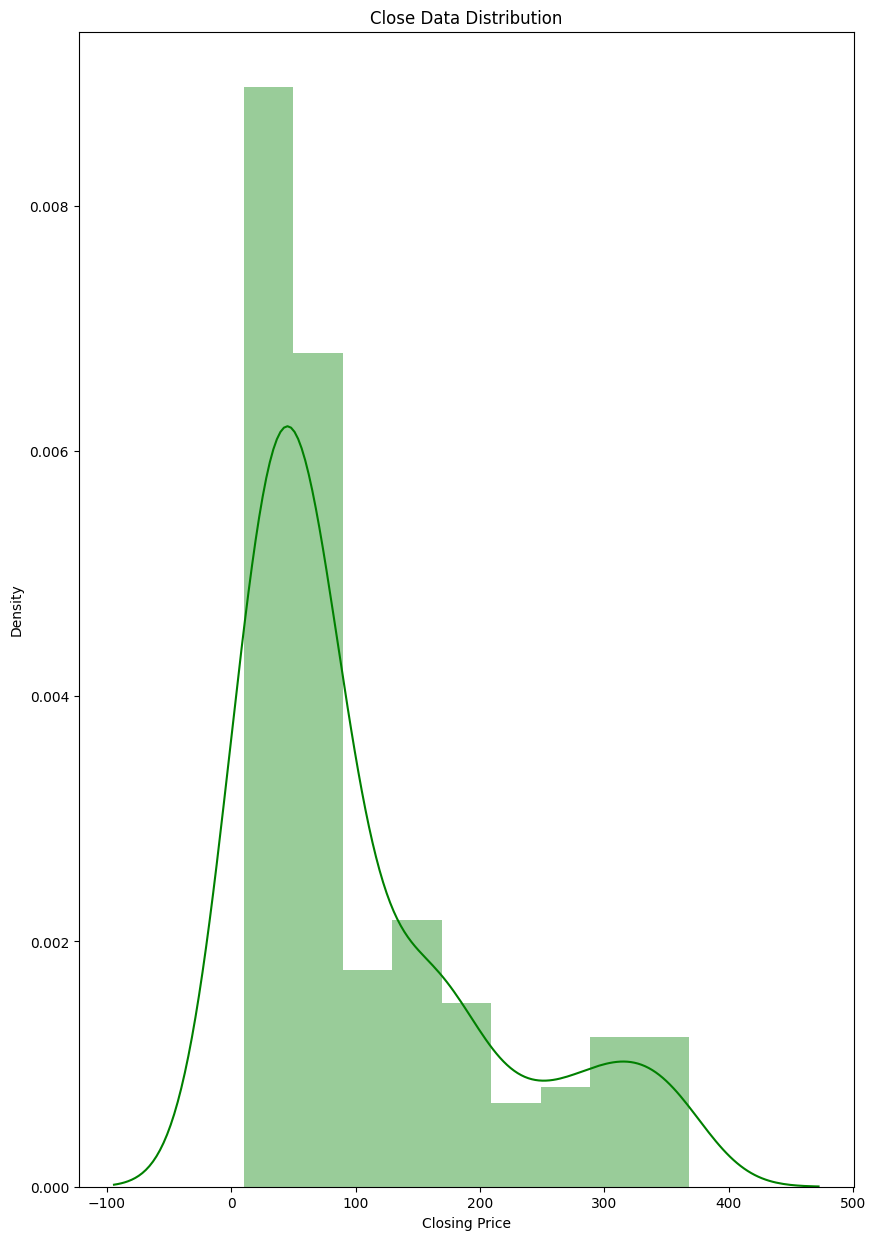

In [25]:
# Dependent variable 'Closing price'
plt.figure(figsize=(10,15))
sns.distplot(yes_bank_df['Close'],color="g")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

In [26]:

# visualise the data
fig = px.line(yes_bank_df, yes_bank_df['Date'],yes_bank_df['Close'], title='Monthly closing price')
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Closing price'),
    autosize=False,
    width=1400,
    height=400)

fig.show()


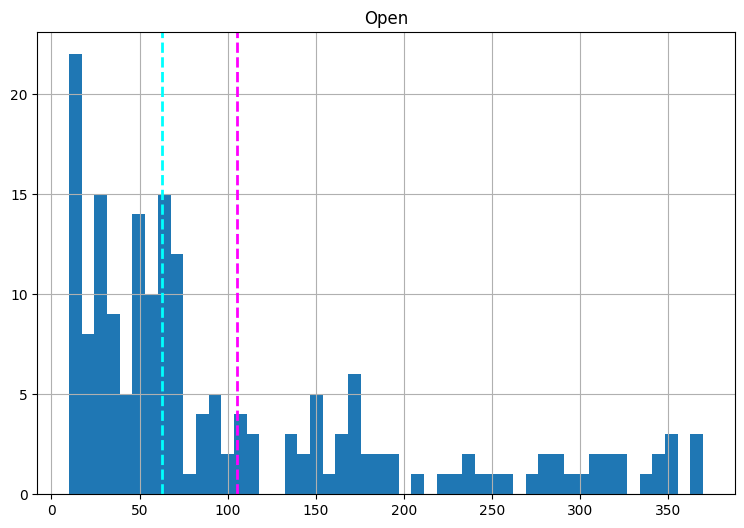

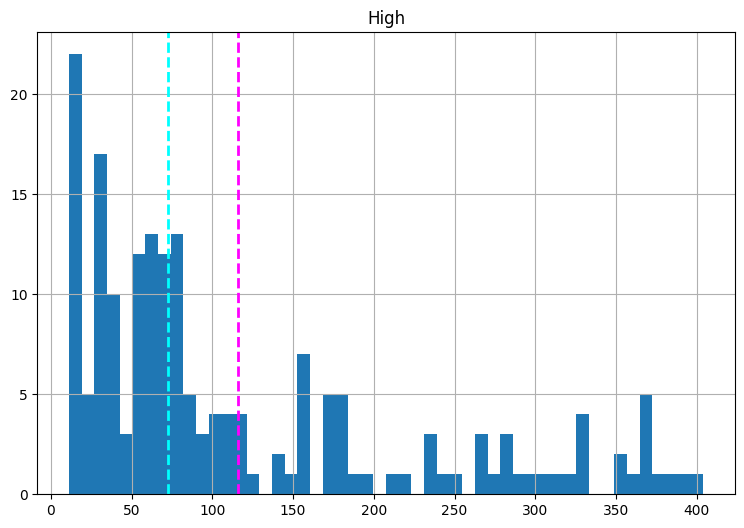

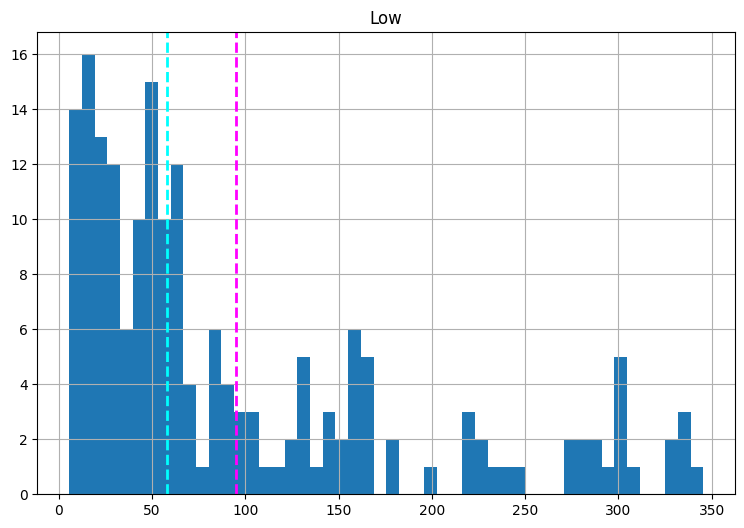

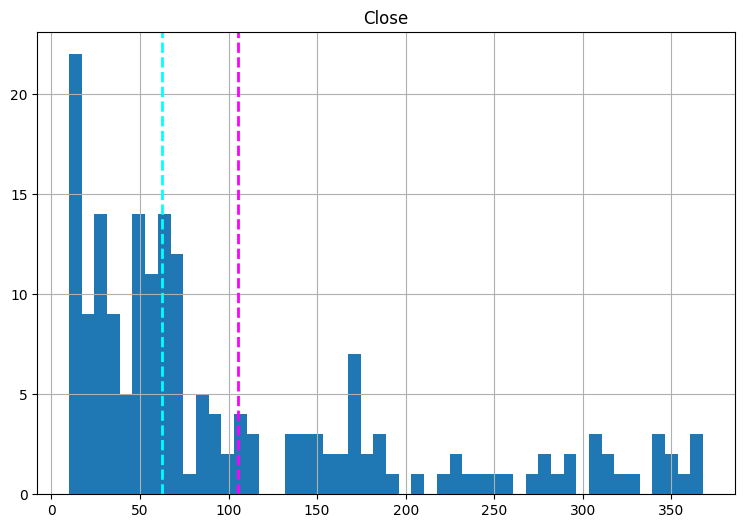

In [27]:
# Check for skewness in the dataset
numeric_features = yes_bank_df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = yes_bank_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
    plt.show()

## Train - Test split

In [28]:
 ## time-series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

In [29]:
# function for splitting time-series dataset
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """

    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    scaler = StandardScaler()
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]

    return X_train, X_test, y_train, y_test

In [30]:

# choose appropriate dependent and independent variables
y = yes_bank_df.dropna().Close
X = yes_bank_df.dropna().drop(['Date','Close','Open','High','Low'], axis=1)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.2)


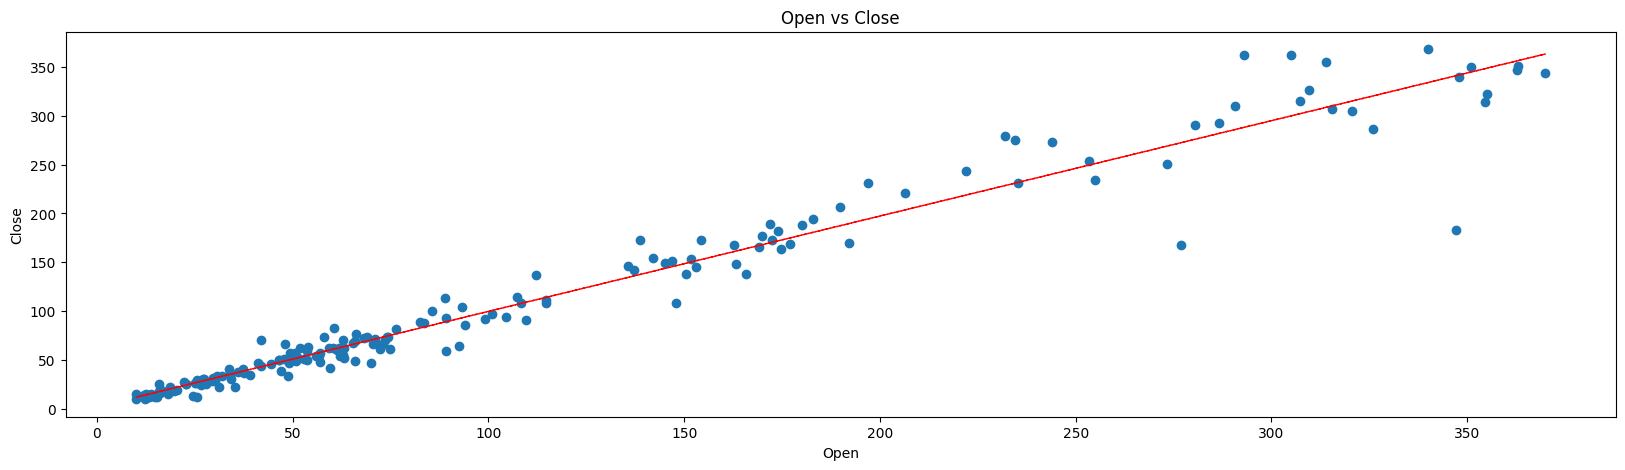

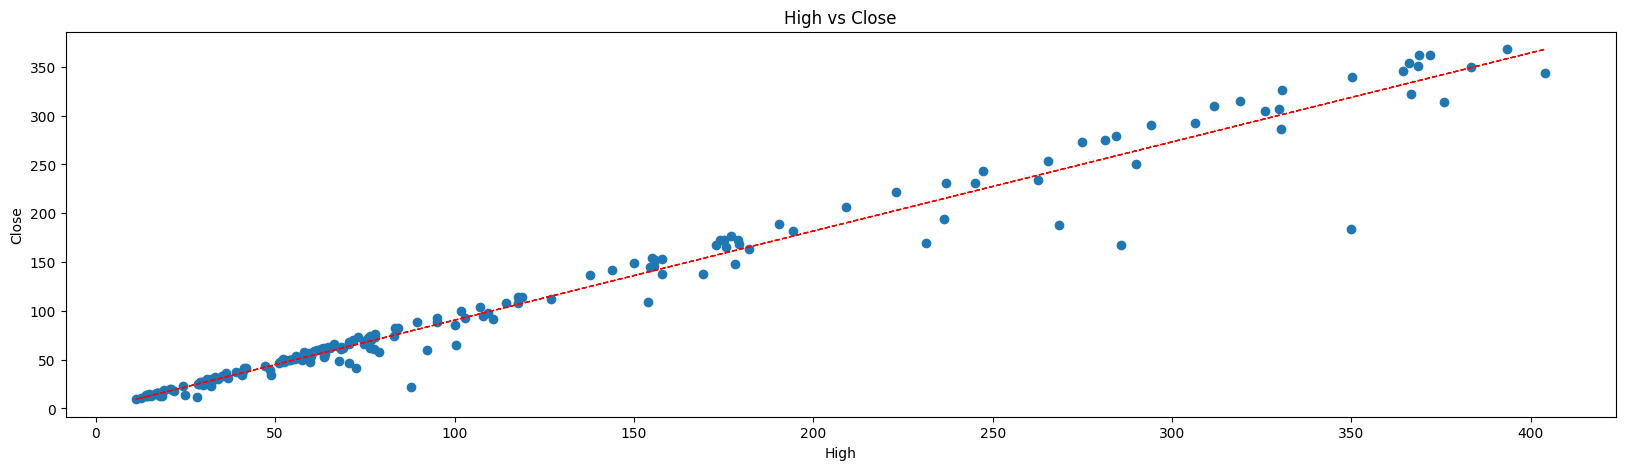

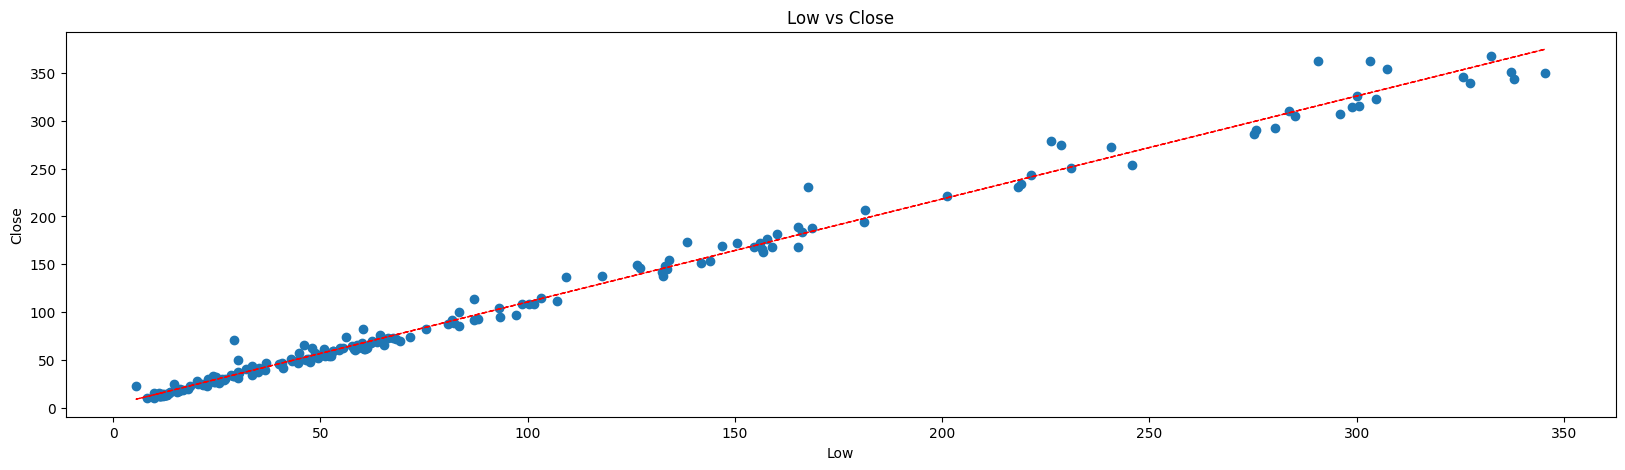

In [24]:
# scatter plot to see the relationship between dependent & independent variables
for col in yes_bank_df.describe().columns[:-1]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()
  plt.scatter(yes_bank_df[col], yes_bank_df['Close'])
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))
  z = np.polyfit(yes_bank_df[col], yes_bank_df['Close'], 1)
  y_hat = np.poly1d(z)(yes_bank_df[col])
  plt.plot(yes_bank_df[col], y_hat, "r--", lw=1)
  plt.show()

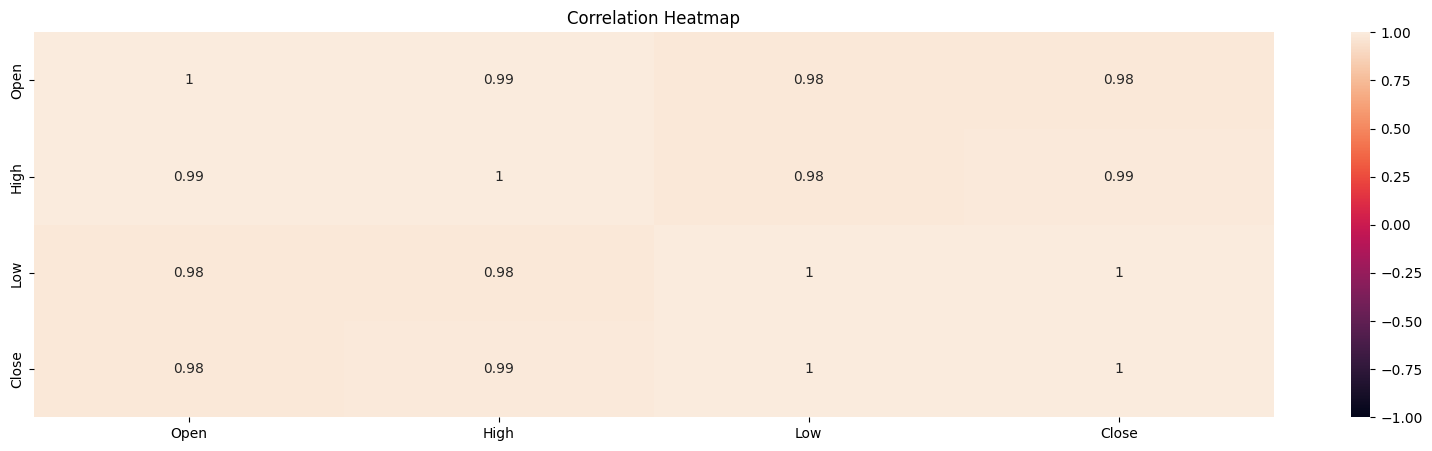

In [31]:
# check for existence of corelation
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
cor = sns.heatmap(yes_bank_df.corr(), vmin=-1, vmax=1, cmap=None, annot=True )

## Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.***italicized text*** **bold text**

## Correlation Coefficient and Heatmap

The correlation coefficient is a numerical measure of the strength and direction of a linear relationship between two variables. In other words, it measures the extent to which changes in one variable are associated with changes in the other variable. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

The correlation coefficient is an important tool in data analysis and machine learning, as it can help to identify relationships between variables and can be used in feature selection techniques to remove highly correlated features, which can reduce overfitting and improve the performance of the model.

<Axes: >

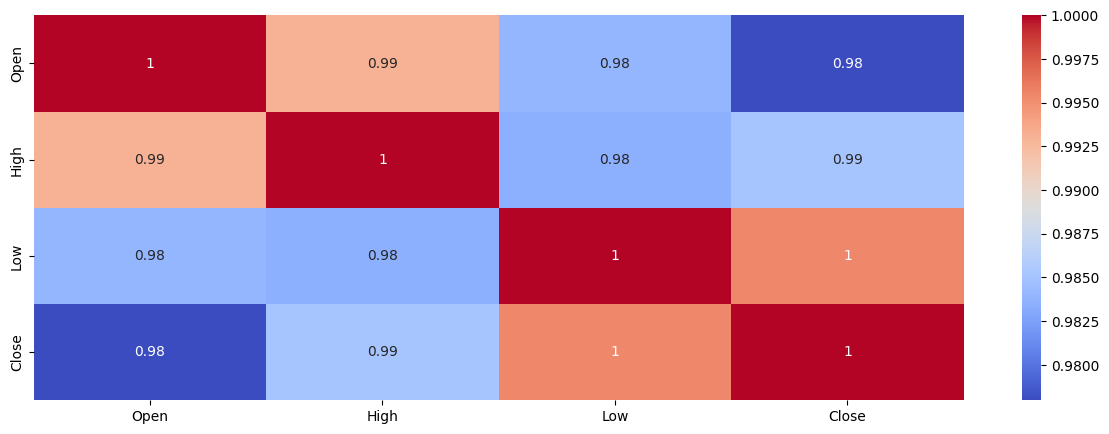

In [32]:
# coorealtion between feature
plt.figure(figsize=(15,5))
sns.heatmap(yes_bank_df.corr(), annot=True, cmap='coolwarm')


To reduce multicollinearity we can use regularization that means to keep all the features but reducing the magnitude of the coefficients of the model. This is a good solution when each predictor contributes to predict the dependent variable.

## Implementation of linear regression model


## Regression is a supervised learning technique that supports finding the correlation among variables. A regression problem is when the output variable is a real or continuous value.

In [33]:
# initialize and fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)


ValueError: ignored

In [34]:
# function to plot model performance
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies

    """



    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)

    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train,
                                    cv=tscv,
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()

        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)

        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)

        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_testupper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")

    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

# function to plot coefficients
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """

    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')

plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)



NameError: ignored

<Figure size 1500x700 with 0 Axes>

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

In [ ]:
# Dataset Describe

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***